In [123]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from pickle import dump

# Carga de datos

In [124]:
df_recomendaciones = pd.read_csv("../data/raw/adult-census-income.csv")
df_recomendaciones

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [125]:
df_recomendaciones.shape

(32561, 15)

In [126]:
df_recomendaciones.info

<bound method DataFrame.info of        age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married

# limpieza

In [127]:
df_recomendaciones = df_recomendaciones.replace("?", pd.NA).dropna().reset_index(drop=True)
df_recomendaciones


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30158,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30159,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30160,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


# Analisis univariado

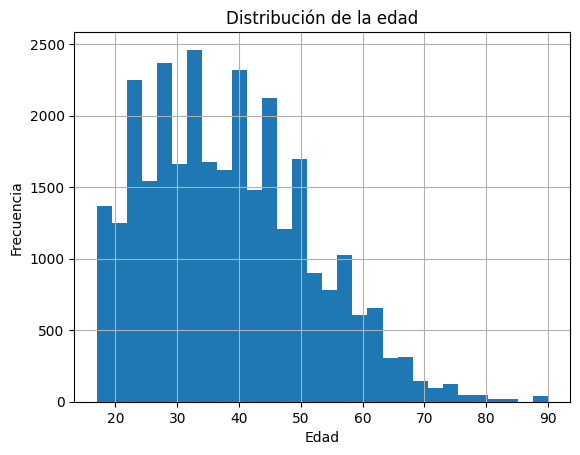

In [128]:
df_recomendaciones["age"].hist(bins=30)
plt.title("Distribución de la edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

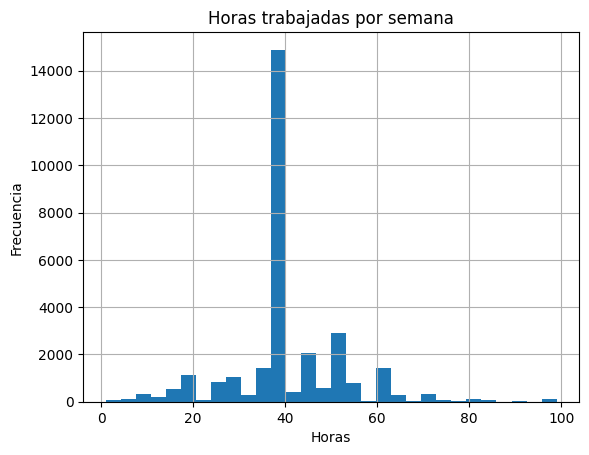

In [129]:
df_recomendaciones["hours.per.week"].hist(bins=30)
plt.title("Horas trabajadas por semana")
plt.xlabel("Horas")
plt.ylabel("Frecuencia")
plt.show()

# Análisis bivariado (Ingreso vs variables clave)

In [130]:
pd.crosstab(df_recomendaciones["education"], df_recomendaciones["income"])

income,<=50K,>50K
education,,
10th,761,59
11th,989,59
12th,348,29
1st-4th,145,6
5th-6th,276,12
7th-8th,522,35
9th,430,25
Assoc-acdm,752,256
Assoc-voc,963,344


In [131]:
pd.crosstab(df_recomendaciones["education"], df_recomendaciones["income"], normalize="index")

income,<=50K,>50K
education,,
10th,0.928049,0.071951
11th,0.943702,0.056298
12th,0.923077,0.076923
1st-4th,0.960265,0.039735
5th-6th,0.958333,0.041667
7th-8th,0.937163,0.062837
9th,0.945055,0.054945
Assoc-acdm,0.746032,0.253968
Assoc-voc,0.736802,0.263198


In [132]:
pd.crosstab(df_recomendaciones["sex"], df_recomendaciones["income"], normalize="index")

income,<=50K,>50K
sex,,
Female,0.886322,0.113678
Male,0.686163,0.313837


In [133]:
df_recomendaciones.groupby("income")["hours.per.week"].mean()

income
<=50K    39.348592
>50K     45.706580
Name: hours.per.week, dtype: float64

# Target binario

In [134]:
df_recomendaciones["income_bin"] = (df_recomendaciones["income"].str.strip() == ">50K").astype(int)
df_recomendaciones

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,income_bin
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K,0
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
30158,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
30159,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
30160,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0


¿Qué se quiere recomendar?

Se quiere recomendar trayectorias socio-laborales que aumenten la probabilidad de que una persona tenga un ingreso anual mayor a 50K USD.

No se recomienda un objeto físico, sino características de personas que lograron mayores ingresos.

¿Quién es el usuario?

El usuario es una persona representada por una fila del dataset.

Cada usuario tiene un perfil socio-laboral:

Edad

Educación

Ocupación

Horas trabajadas

Sexo, raza, país, etc.

¿Qué variables definen el perfil del usuario?

# Columnas categóricas y numéricas

In [135]:
cat_cols = df_recomendaciones.select_dtypes(include="object").columns.drop("income")
num_cols = df_recomendaciones.select_dtypes(exclude="object").columns.drop("income_bin", errors="ignore")

cat_cols, num_cols


/tmp/ipykernel_7720/928319333.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = df_recomendaciones.select_dtypes(include="object").columns.drop("income")


(Index(['workclass', 'education', 'marital.status', 'occupation',
        'relationship', 'race', 'sex', 'native.country'],
       dtype='str'),
 Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
        'hours.per.week'],
       dtype='str'))

In [136]:
corr_matrix = df_recomendaciones[num_cols].corr()
corr_matrix

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599
fnlwgt,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886
education.num,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522
capital.gain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432
capital.loss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417
hours.per.week,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000


#  OneHot + Escalado

In [137]:
preprocessor = ColumnTransformer(transformers=[("num", StandardScaler(), list(num_cols)), ("cat", OneHotEncoder(handle_unknown="ignore"), list(cat_cols)),], remainder="drop")

# split

In [138]:
X = df_recomendaciones.drop(columns=["income", "income_bin"])
y = df_recomendaciones["income_bin"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression

In [139]:
pipe = Pipeline([("prep", preprocessor), ("model", LogisticRegression(max_iter=1000))])

pipe.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('prep', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains s

# Sistema de recomendación

In [140]:
education_num_map = (df_recomendaciones.drop_duplicates("education")[["education","education.num"]].set_index("education")["education.num"].to_dict())

función recomendadora

In [141]:
def recomendar_trayectoria(user_profile, model, df):
    base_prob = model.predict_proba(pd.DataFrame([user_profile]))[0][1]
    
    education_options = df["education"].unique()
    recomendaciones = []

    for edu in education_options:
        if edu == user_profile["education"]:
            continue

        mod = user_profile.copy()
        mod["education"] = edu
        
        if "education.num" in mod:
            mod["education.num"] = education_num_map[edu]

        prob = model.predict_proba(pd.DataFrame([mod]))[0][1]

        if prob > base_prob:
            recomendaciones.append((edu, prob))

    if not recomendaciones:
        return f"Prob actual: {base_prob:.2f} → sin mejoras claras"

    best = max(recomendaciones, key=lambda x: x[1])

    return (f"Prob actual: {base_prob*100:.1f}%\n"
            f"Mejor educación sugerida: {best[0]}\n"
            f"Nueva probabilidad: {best[1]*100:.1f}%")

ejemplo

In [142]:
row = df_recomendaciones[df_recomendaciones["income_bin"] == 0].iloc[0]

perfil_real = row.drop(["income","income_bin"]).to_dict()

recomendar_trayectoria(perfil_real, pipe, df_recomendaciones)

'Prob actual: 60.4%\nMejor educación sugerida: Doctorate\nNueva probabilidad: 93.2%'

# guardado

In [143]:
with open("../data/processed/adult_census_clean.pkl", "wb") as f:
    dump(df_recomendaciones, f)